In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("/Users/zhangkaixuan/Desktop/total3_v2.csv")
df2 = pd.read_csv("/Users/zhangkaixuan/Desktop/total2_v2.csv")

In [3]:
df_append = df1.append(df2, ignore_index=True)

In [4]:
df3 = pd.read_csv("/Users/zhangkaixuan/Desktop/wsb_submissions_v2.csv")
df_append2 = df_append.append(df3, ignore_index=True)

In [9]:
df4600 = pd.read_csv("/Users/zhangkaixuan/Desktop/total4600-4799.csv", engine='python')
df5012 = pd.read_csv("/Users/zhangkaixuan/Desktop/total4800-5012.csv", engine='python')

In [10]:
df_reddit = df4600.append(df5012, ignore_index=True)

In [12]:
df_reddit_final = df_reddit[['game', 'polarity', 'subjectivity']]
df_reddit_final

,game,polarity,subjectivity
0,Hidden Map,0.048611,0.574074
1,Hidden Map,-0.322222,0.577778
2,Hidden Map,-0.036190,0.633810
3,Hidden Map,-0.166667,0.333333
4,Hidden Map,0.065303,0.438753
...,...,...,...
29336,Walkabout Mini Golf,0.033929,0.698214
29337,Walkabout Mini Golf,0.550000,0.475000
29338,Walkabout Mini Golf,0.178000,0.518493
29339,Walkabout Mini Golf,0.175000,0.400000


In [13]:
df_reddit_final.to_csv('Reddit.csv')

In [15]:
neg = []
pos = []
neu = []
perfect_neg = []
perfect_pos = []
p = []
for i in df_reddit_final["polarity"]:
    if -1 < float(i) < 0:
        neg.append(1)
        p.append('Negative')
    elif float(i) == 0:
        neu.append(1)
        p.append('Neural')
    elif 0 < float(i) < 1:
        pos.append(1)
        p.append('Positive')
    elif float(i) == 1:
        perfect_pos.append(1)
        p.append('Positive')
    elif float(i) == -1:
        perfect_pos.append(1)
        p.append('Negative')
print(len(neg), len(pos), len(neu), len(perfect_neg), len(perfect_pos))

3931 23273 1991 0 106


# Analysis of the Reviewer's tone

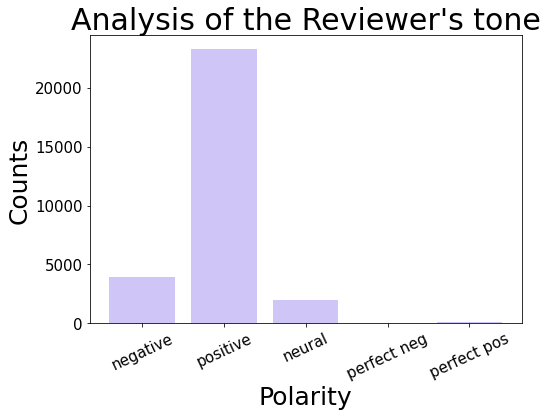

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['negative', 'positive', 'neural', 'perfect neg', 'perfect pos']
students = [len(neg), len(pos), len(neu), len(perfect_neg), len(perfect_pos)]
ax.bar(langs,students, color = '#CFC5F7')
plt.title("Analysis of the Reviewer's tone", size=30)
plt.xlabel('Polarity', size = 25)
plt.ylabel('Counts', size = 25)
plt.rcParams['font.size'] = 15
plt.xticks(rotation=25)
plt.show()

# Subject vs Polarity

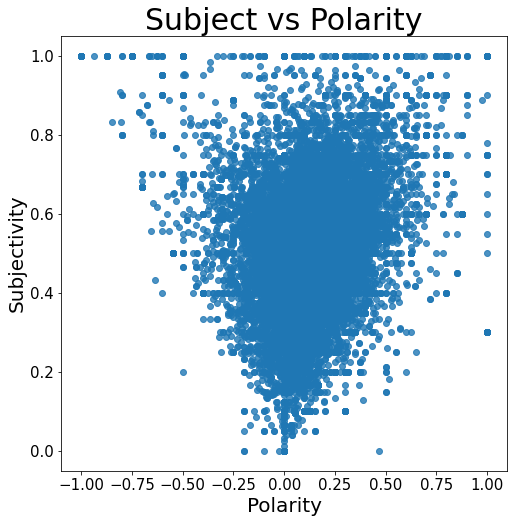

In [26]:
import seaborn as sns
plt.figure(figsize = (8, 8))
#sns.scatterplot(x = 'polarity', y = 'subjectivity', hue = 'address', s = 70, alpha=0.5, data = df_append2)
splot = sns.regplot(x="polarity", y="subjectivity", 
                    data=df_reddit_final, fit_reg=False)
plt.title('Subject vs Polarity', size = 30)
plt.xlabel('Polarity', size = 20)
plt.ylabel('Subjectivity', size = 20)
plt.show()

# Analysis of Genre Type

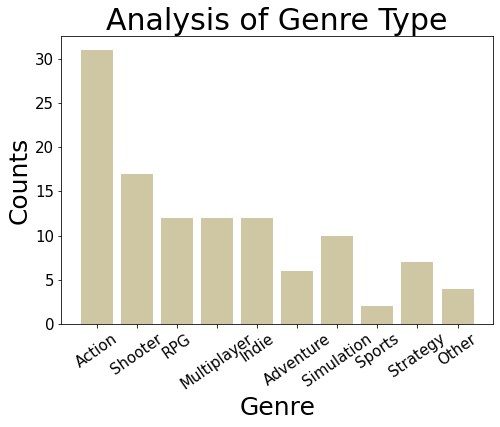

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Action', 'Shooter', 'RPG', 'Multiplayer', 'Indie', 'Adventure', 'Simulation', 'Sports', 'Strategy', 'Other', ]
students = [31, 17, 12, 12, 12, 6, 10, 2, 7, 4]
ax.bar(langs,students, color = '#CFC6A3')
plt.title("Analysis of Genre Type", size=30)
plt.xlabel('Genre', size = 25)
plt.ylabel('Counts', size = 25)
plt.rcParams['font.size'] = 15
plt.xticks(rotation=35)
plt.show()
plt.show()

# General distribution of game's rating

In [35]:
df5 = pd.read_csv("/Users/zhangkaixuan/Desktop/new_steam_rating.csv")

In [37]:
import math
game_lst = []
rating_lst = []
for x in range(0, 2787):
    game_lst.append(x)
for j in df5.rating:
    rating_lst.append(j)

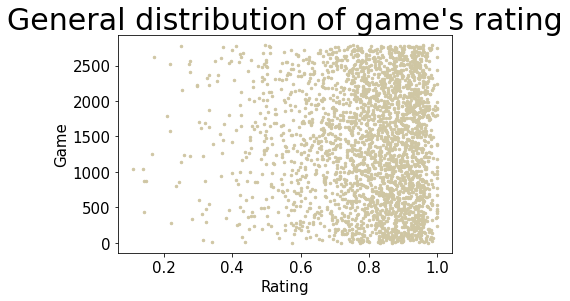

In [41]:
import pandas as pd
import matplotlib.pyplot as plt 
# Prepare data
data={'Game':game_lst,
      'Rating':rating_lst}
  
# Load data into DataFrame
df = pd.DataFrame(data = data);
  
# Draw a scatter plot
df.plot.scatter(x = 'Rating', y = 'Game', s = 6, color = '#CFC6A3')
plt.title("General distribution of game's rating", size = 30)
plt.xlabel('Rating', size = 15)
plt.ylabel('Game', size = 15)

plt.show()

# Precision with different topK measure

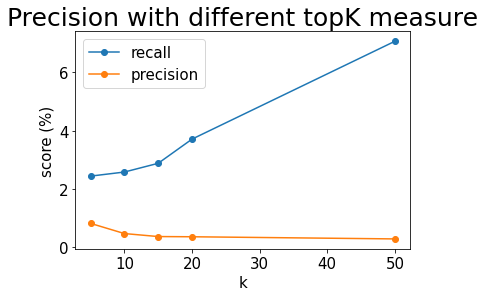

In [42]:
import matplotlib.pyplot as plt
  
# create data
x = [5,10,15,20,50]
recall = [2.440, 2.58, 2.88, 3.71, 7.07]
precision = [0.817, 0.468, 0.365, 0.358, 0.284]
  
# plot lines
plt.plot(x, recall, label = "recall", marker='o')
plt.plot(x, precision, label = "precision", marker='o')
plt.title("Precision with different topK measure", size = 25)
plt.xlabel('k', size = 15)
plt.ylabel('score (%)', size = 15)
plt.legend()
plt.show()

# Precision with different features

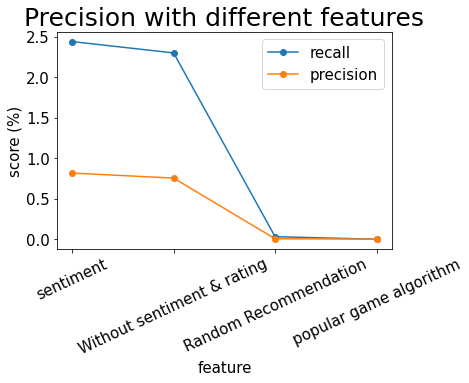

In [44]:
x = ['sentiment', 'Without sentiment & rating', 'Random Recommendation', 'popular game algorithm']
recall = [2.440, 2.30, 0.0320204, 0]
precision = [0.817, 0.755, 0.0064, 0.00160102]
  
# plot lines
plt.plot(x, recall, label = "recall", marker='o')
plt.plot(x, precision, label = "precision", marker='o')
plt.title("Precision with different features", size = 25)
plt.xlabel('feature', size = 15)
plt.ylabel('score (%)', size = 15)
plt.xticks(rotation=25)
plt.legend()
plt.show()